In [1]:
# %pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
# %pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
# For layers
from tensorflow.keras.layers import Flatten, Dense
# For miscellaneous functions
from tensorflow.keras import utils
# For datasets
from tensorflow.keras.datasets import mnist
# For math functions and arrays
import numpy as np
# For plotting
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Metal device set to: Apple M2


2023-10-18 20:31:17.630311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-18 20:31:17.630440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_Y_categorical = utils.to_categorical(train_Y)
test_Y_categorical = utils.to_categorical(test_Y)

print("Training data shape: ", train_X.shape)
print("Training labels shape: ", train_Y.shape)
print("Test data shape: ", test_X.shape)
print("Test labels shape: ", test_Y.shape)

print('an example of test_Y_categorical',test_Y_categorical[:,1])
print('shape of test_Y_categorical is',test_Y_categorical.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)
an example of test_Y_categorical [0. 0. 1. ... 0. 0. 0.]
shape of test_Y_categorical is (10000, 10)


In [5]:
history = model.fit(train_X, train_Y_categorical, epochs=10, validation_split=0.33)

Epoch 1/10


2023-10-18 20:31:27.386705: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-18 20:31:27.550855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1257/1257 [==============================] - ETA: 0s - loss: 2.9498 - accuracy: 0.6943

2023-10-18 20:32:19.252959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1257/1257 [==============================] - 72s 55ms/step - loss: 2.9498 - accuracy: 0.6943 - val_loss: 0.7381 - val_accuracy: 0.8121
Epoch 2/10
1257/1257 [==============================] - 62s 49ms/step - loss: 0.5820 - accuracy: 0.8448 - val_loss: 0.4723 - val_accuracy: 0.8753
Epoch 3/10
1257/1257 [==============================] - 63s 50ms/step - loss: 0.4064 - accuracy: 0.8848 - val_loss: 0.4090 - val_accuracy: 0.8926
Epoch 4/10
1257/1257 [==============================] - 63s 50ms/step - loss: 0.3471 - accuracy: 0.9018 - val_loss: 0.3529 - val_accuracy: 0.9079
Epoch 5/10
1257/1257 [==============================] - 63s 50ms/step - loss: 0.3103 - accuracy: 0.9105 - val_loss: 0.3623 - val_accuracy: 0.9030
Epoch 6/10
1257/1257 [==============================] - 63s 50ms/step - loss: 0.2934 - accuracy: 0.9155 - val_loss: 0.3462 - val_accuracy: 0.9115
Epoch 7/10
1257/1257 [==============================] - 63s 50ms/step - loss: 0.2780 - accuracy: 0.9227 - val_loss: 0.3035 - val_accura

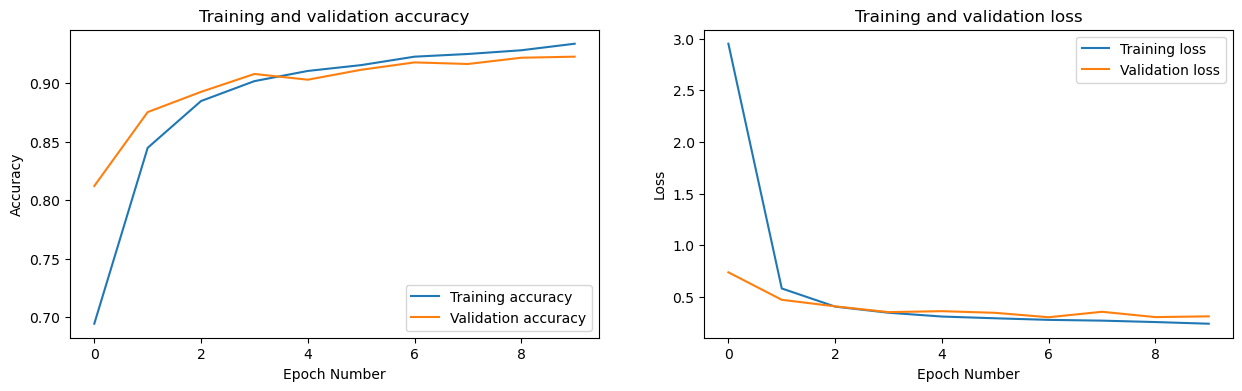

In [6]:
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

In [7]:
predict = model.predict(test_X[:1,:,:])
print('Predict shape: ', predict.shape)
print('Prediction for first test image: \n', predict[0])
print('Classification of the first test image: digit ', np.argmax(predict[0]))

2023-10-18 20:42:32.999911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 551ms/step
Predict shape:  (1, 10)
Prediction for first test image: 
 [4.9967648e-20 8.7296588e-09 1.7695669e-06 4.6777348e-08 3.8465667e-12
 6.5582240e-12 1.8924422e-24 9.9999821e-01 1.2558539e-11 3.6486109e-10]
Classification of the first test image: digit  7


In [8]:
train_loss, train_acc = model.evaluate(train_X,  train_Y_categorical)
test_loss, test_acc = model.evaluate(test_X,  test_Y_categorical)
print('Classification accuracy on training set: ', train_acc)
print('Classification accuracy on test set: ', test_acc)

313/313 [==============================] - 11s 34ms/step - loss: 0.2973 - accuracy: 0.9279
Classification accuracy on training set:  0.9333999752998352
Classification accuracy on test set:  0.9279000163078308


In [9]:
test_predict = model.predict(test_X)
# Get the classification labels
test_predict_labels = np.argmax(test_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
print('Confusion matrix of the test set:\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion matrix of the test set:
 tf.Tensor(
[[ 950    1    6    0    3    1   10    1    8    0]
 [   0 1118    5    3    0    2    2    0    5    0]
 [   2    1  960   11   14    1    4   10   28    1]
 [   0    0   46  915    2   23    1    7   13    3]
 [   1    5   11    0  899    0   10    0   13   43]
 [   5    1    2   52    1  775   14    1   40    1]
 [   3    3    6    0    3    6  921    0   16    0]
 [   2    7   37    7    6    0    0  940    4   25]
 [   9    1   31    7    5   13   12    1  891    4]
 [   5    6    0    5   10   24    1    4   44  910]], shape=(10, 10), dtype=int32)


In [10]:
flat_layer = model.layers[0]
hidden_layer = model.layers[1]
output_layer = model.layers[2]

def get_hidden_layer_output(model, X):  
    # Convert X to a tensor
    x = tf.convert_to_tensor(np.reshape(X, (1, 28, 28)),
                             dtype=tf.dtypes.float32)# Model layers
    flat_layer = model.layers[0]
    hidden_layer = model.layers[1]
    output_layer = model.layers[2]# Pass x through different layers
    flat_tensor = flat_layer(x)
    hidden_tensor = hidden_layer(flat_tensor)
    output_tensor = output_layer(hidden_tensor)
    predicted_digit = np.argmax(output_tensor)
    return hidden_tensor, predicted_digit


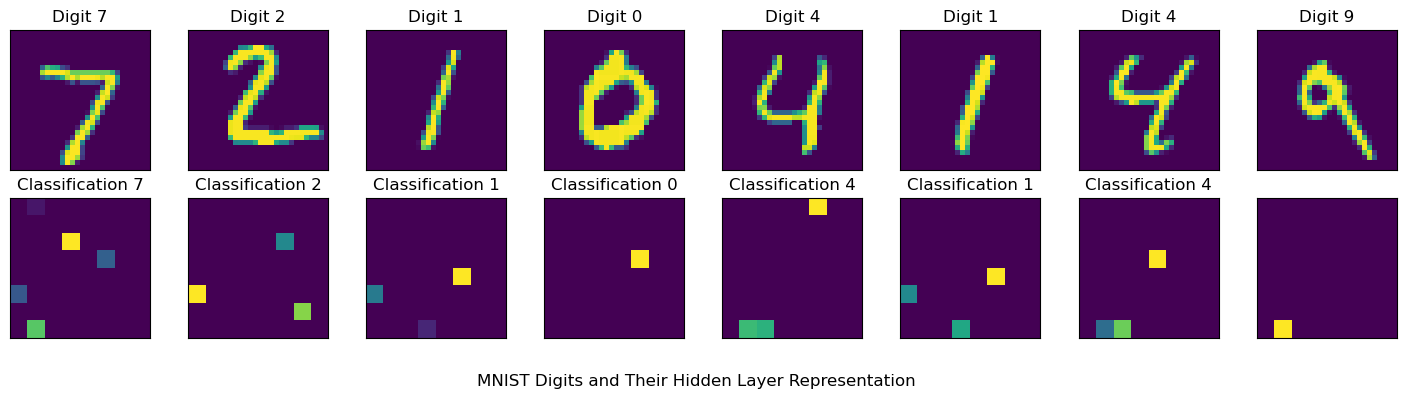

In [11]:
total_cols = 8
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))

for j in range(total_cols):
    image = test_X[j, :, :]
    h, prediction = get_hidden_layer_output(model, image)
    ax[0, j].imshow(image)
    ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))   
    ax[0, j].set_title('Digit ' + str(test_Y[j]))
    ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)    
plt.show()   

In [12]:
test_X.shape

(10000, 28, 28)

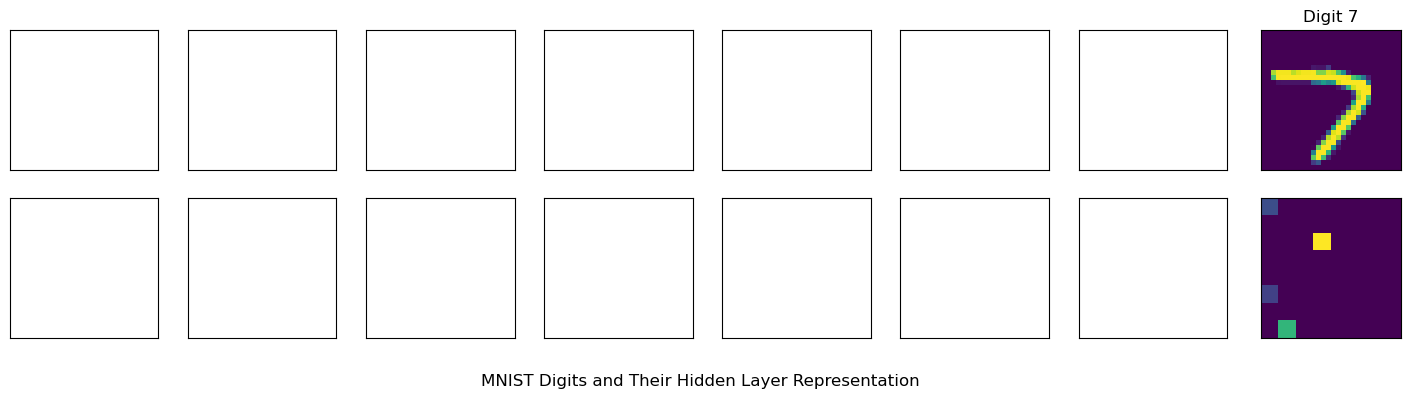

In [13]:
test_num=70
image = test_X[test_num, :, :]
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))
h, prediction = get_hidden_layer_output(model, image)
ax[0, j].imshow(image)
ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))   
ax[0, j].set_title('Digit ' + str(test_Y[test_num]))
ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)    
plt.show()   